# Supercúmulos de Estrellas:

Las estrellas masivas producen grandes regiones ionizadas (H II) que emiten fuertemente en longitudes de onda de radio a través del mecanismo Bremsstrahlung (libre-libre). Esta emisión se distingue fácilmente de otros procesos radiativos por su espectro característico. Mezger & Henderson (1967) proporcionan la siguiente aproximación útil para la profundidad óptica de bremsstrahlung:

$$\tau(\nu) = 8.235 \times 10^{-2} \ \nu_{GHz}^{-2.31} \ T_{e}^{-1.35} \ EM $$

donde $\tau(\nu)$ es la profundidad óptica, $\nu$ la frecuencia en GHz, $T_{e}$ la temperatura
electrónica en kelvin y $EM$ la medida de emisión en unidades de $cm^{−6} \ pc$.

### Profundidad Óptica

Transformación logarítmica:

$$\tau = C \nu^{-2.1}$$

Entonces, utilizando una escala LogLog:

$$Log(\tau) = Log(C)-2.1Log(\nu)$$

In [1]:
#Importar librerías:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k, parsec
import scipy.integrate as integrate

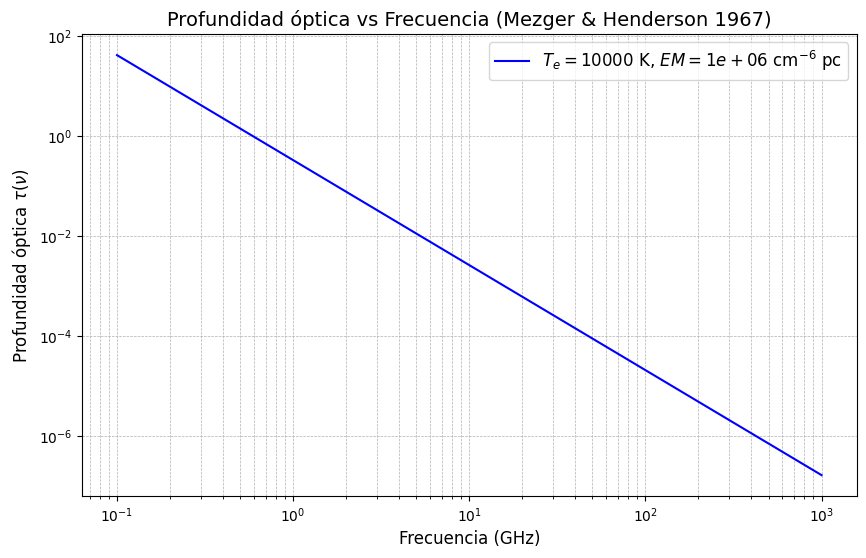

In [2]:
# Parámetros físicos dados en el problema:
Te = 1e4  # Temperatura electrónica en K
EM = 1e6  # Medida de emisión en cm^-6 pc

# Constante del modelo
constante = 8.235e-2

# Frecuencias en GHz
frequencies = np.logspace(-1, 3, 500)  # De 0.1 GHz a 100 GHz

# Cálculo de la profundidad óptica usando la aproximación dada
tau = constante * (frequencies**-2.1) * (Te**-1.35) * EM

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frequencies, tau, label=f"$T_e = {Te:.0f}$ K, $EM = {EM:.0e}$ cm$^{{-6}}$ pc", color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frecuencia (GHz)", fontsize=12)
plt.ylabel("Profundidad óptica $\\tau(\\nu)$", fontsize=12)
plt.title("Profundidad óptica vs Frecuencia (Mezger & Henderson 1967)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

# Parte I: Modelo de la Spectral Energy Distribution.

Utilice la aproximación para la profundidad óptica de Mezger & Henderson (1967) y la solución general a la ecuación de transferencia radiativa para trazar el SED (Spectral Energy Distribution) de una región H II con una temperatura electrónica $T_{e}= K$, una medida de emisión $EM=1\times 10^{6} \ cm^{-6} \ pc$, y ubicada a una distancia $d= 1 \ kpc$. 

Además, incorpore el efecto de una cantidad de polvo equivalente a una masa solar, que emita radiación térmica como un cuerpo gris. Para este modelo, asuma un índice espectral del cuerpo gris $\beta=1$ y que el polvo se encuentra a la misma temperatura que el gas ionizado.

#### Spectral Energy Distribution

Una Spectral Energy Distribution (SED, Distribución de Energía Espectral) es una representación gráfica de cómo se distribuye la energía de una fuente astrofísica en función de la frecuencia (𝜈) o la longitud de onda (𝜆). Es una herramienta fundamental en astrofísica para estudiar las propiedades físicas de objetos como estrellas, galaxias, regiones H II, cúmulos de estrellas, entre otros.


Formas típicas:

- Estrellas y objetos térmicos: Siguen la ley de Planck, con un pico característico relacionado con su temperatura.

- Regiones H II: Combina emisión de bremsstrahlung (en el rango de radio) con líneas de emisión y emisión de polvo a mayores longitudes de onda.

- Galaxias: Suma de contribuciones estelares, térmicas, no térmicas, y polvo, a menudo con varios picos.

#### Ecuación de Transferencia Radiativa:

Consideremos la Ecuación de Transferencia Radiativa:

$$\frac{dI_{\nu}}{d\tau_{\nu}}=I_{\nu}+S_{\nu}$$

La solución de esta ecuación está dada por:

$$I_{\nu}(\tau_{\nu})=I_{\nu}(0)\ e^{-\tau_{\nu}} + S_{\nu} \left(1- e^{-\tau_{\nu}} \right)$$

Como no vamos a considerar la contribución de la radiación de fondo de las estrellas que ionizan el medio $\left(I_{\nu}(0)=0\right)$, tenemos que la expresión se reduce a:

$$I_{\nu}(\tau_{\nu})= S_{\nu} \left(1- e^{-\tau_{\nu}} \right)$$

#### Flujo para una Región H II Esférica. 

Calculemos el flujo a una distancia arbitraria de una esfera de brillo uniforme B (es decir, todos los rayos que salen de la esfera tienen el mismo brillo). Tal esfera es claramente una fuente isótropa. En P, la intensidad específica es B si el rayo cruza la esfera y cero en caso contrario. Entonces:

$$F=\displaystyle \int I \cos(\theta) d\Omega$$

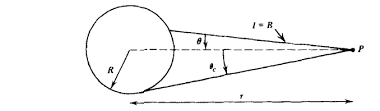

Resolviendo la integral con la información geométrica del problema:

$$F=\displaystyle \int I \cos(\theta) sin(\theta)d\theta d\phi$$

$$F=\displaystyle \int_{0}^{2\pi} \int_{0}^{\theta_{c}} I \cos(\theta) sin(\theta)d\theta d\phi$$

$$F=\displaystyle I \int_{0}^{2\pi} d\phi \int_{0}^{\theta_{c}}  \cos(\theta) sin(\theta)d\theta$$

Resolviendo, obtenemos que:

$$F=\pi I\left(1-cos^{2}\left(\theta_{c}\right)\right)=\pi I sin^{2}\left(\theta_{c}\right)$$

De la geometría del problema, obtenemos que:

$$sin\left(\theta_{c}\right)=\frac{R}{r}$$

Sustituyendo, obtenemos que:

$$F=\pi I_{\nu} \left(\frac{R}{r}\right)^{2}$$

donde $R$ es el radio de la región H II y $r$ es la distancia de la fuente al observador.

#### Flujo por Bremsstrahlung:

Usando el modelo esférico para una región H II:

$$F_{\nu}^{ff}=\pi \left(\frac{R}{r}\right)^{2} I_{\nu}$$

$$F_{\nu}^{ff}=\pi \left(\frac{R}{r}\right)^{2} S_{\nu}\left(1- e^{-\tau_{\nu}} \right)$$

En nuestro caso, vamos a considerar Bremsstrahlung térmico. Donde la función fuente está dada por:

$$S_{\nu}=\frac{j_{\nu}}{\alpha_{\nu}}=B_{\nu}(T_{e})$$

De modo que nuestra expresión nos queda dada por:

$$F_{\nu}^{ff}=\pi \left(\frac{R}{r}\right)^{2} B_{\nu}(T_{e})\left(1- e^{-\tau_{\nu}} \right)$$

#### Flujo por Polvo:

El flujo del polvo se modelará siguiendo la propuesta de Draine, B. T. (2003). "Interstellar Dust Grains.", donde:

$$F_{\nu}^{dust} = \kappa_{\nu}B_{\nu}(T)\left(\frac{M_{dust}}{d^{2}}\right)$$

El coeficiente de absorción espectral ($\kappa$) del polvo se modela mediante una relación empírica que depende de la frecuencia ($\nu$) y está ajustada para diferentes tipos de polvo interestelar. En términos generales, $\kappa$ se describe como una función de la frecuencia que varía en diferentes rangos del espectro electromagnético.

La expresión más comúnmente usada por Draine para el coeficiente de absorción espectral $\kappa$ para el polvo interestelar es:

$$\kappa=\kappa_{0}\left(\frac{\nu}{\nu_{0}}\right)^{\beta}$$


En su revisión de polvo interestelar, Draine (2003) describe valores típicos de 𝜅 para la absorción del polvo en la Vía Láctea, usando $𝜅_{0}=0.1 \ cm^{2} \ g^{-1}$ a $\nu_{0}=3\times 10^{11} \ Hz$.


Para regiones H II hay una contribución de emisión Bremsstrahlung y una de emisión del polvo, de modo que:

$$F_{Total} = F_{\nu}^{ff}+F_{\nu}^{dust}$$

De modo que el Flujo total está dado por:

$$F_{Total}=\pi \left(\frac{R}{r}\right)^{2} B_{\nu}(T_{e})\left(1- e^{-\tau_{\nu}} \right) + \kappa_{\nu}B_{\nu}(T_{dust})\left(\frac{M_{dust}}{d^{2}}\right)$$

In [3]:
# Parámetros y constantes
R = 0.1 * 3.086e18  # Radio típico de una UC HII en cm (1 pc = 3.086e18 cm)
d = 1 * 3.086e21  # Distancia de la región en cm (1 kpc = 3.086e21 cm)
T_e = 1e4  # Temperatura electrónica en K
EM = 1e6  # Medida de emisión en cm^-6 pc
kappa_0 = 0.1  # cm^2/g a ν_0
nu_0 = 3e11  # Hz (frecuencia de referencia)
beta = 1  # Índice espectral del polvo para este modelo
M_dust = 2e33/10000  # Masa del polvo  en g (1 masa solar = 2e33 g)

# Frecuencia en Hz y GHz
nu = np.logspace(6, 17, 500)  # Frecuencias 
#nu_GHz = nu / 1e9  # Conversión a GHz

# Función de Planck B_nu(T)
def planck_function(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

# Profundidad óptica 
tau_nu = 8.235e-2 * (nu/1e9)**-2.31 * T_e**-1.35 * EM

# Opacidad del polvo
kappa_nu = kappa_0 * (nu / nu_0)**beta

# Emisión Bremsstrahlung (F_nu^ff)
F_ff = np.pi * (R / d)**2 * planck_function(nu, T_e) * (1 - np.exp(-tau_nu))

# Emisión del polvo (F_nu^dust)
F_dust = kappa_nu * planck_function(nu, T_e) * (M_dust / d**2)

# Flujo total
F_total = F_ff + F_dust

# Conversión de flujo de erg/cm^2/s/Hz a Jansky (1 Jy = 1e-23 erg/cm^2/s/Hz)
F_ff_Jy = F_ff / 1e-23
F_dust_Jy = F_dust / 1e-23
F_total_Jy = F_total / 1e-23

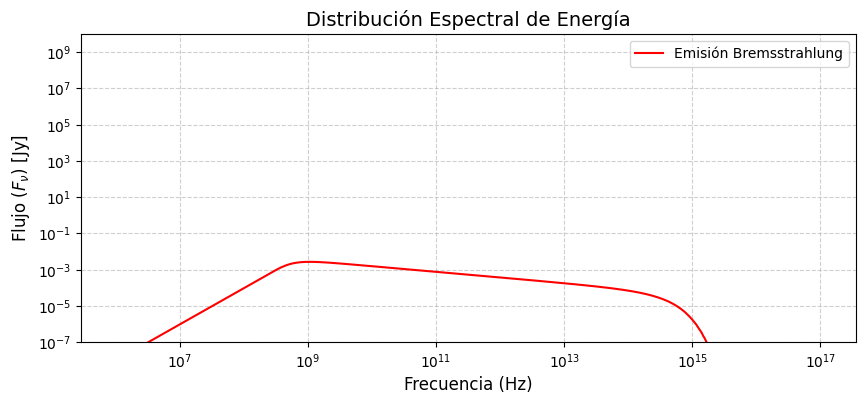

In [4]:
#Gráfica del Flujo por Emisión Bremstrahlung
plt.figure(figsize=(10, 4))
plt.loglog(nu, F_ff_Jy,label="Emisión Bremsstrahlung", color='red')
#plt.loglog(nu, F_dust_Jy,label="Emisión Térmica del Polvo", color='blue')
#plt.loglog(nu, F_total_Jy, label="SED ", color='black')
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-7,1e10)
plt.title("Distribución Espectral de Energía", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

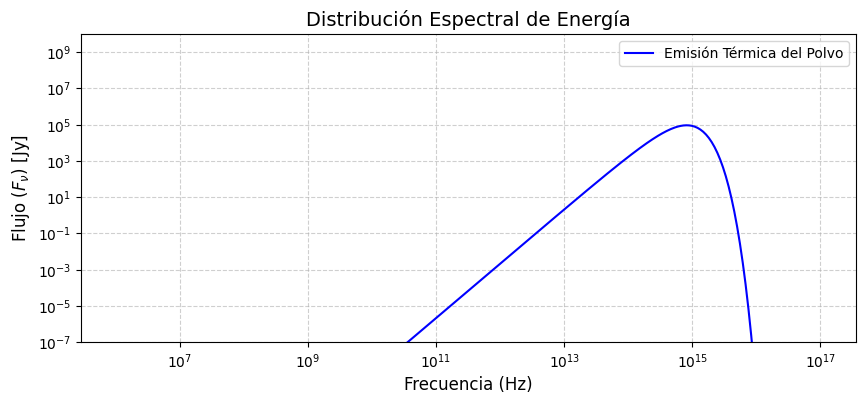

In [5]:
plt.figure(figsize=(10, 4))
plt.loglog(nu, F_dust_Jy,label="Emisión Térmica del Polvo", color='blue')
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-7,1e10)
plt.title("Distribución Espectral de Energía", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

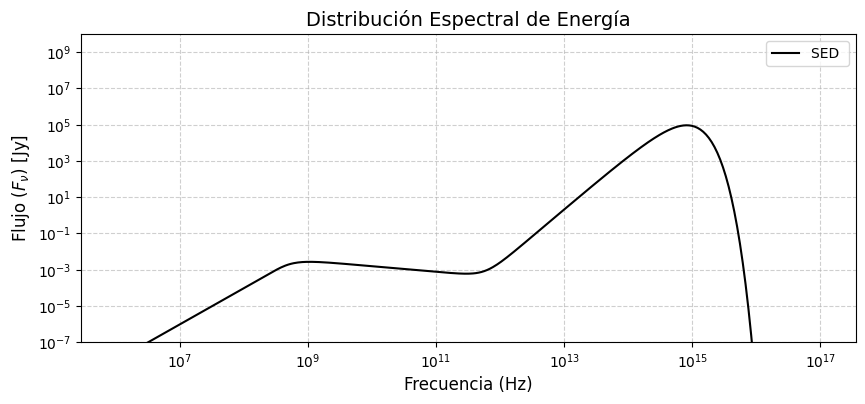

In [6]:
plt.figure(figsize=(10, 4))
plt.loglog(nu, F_total_Jy, label="SED ", color='black')
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-7,1e10)
plt.title("Distribución Espectral de Energía", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

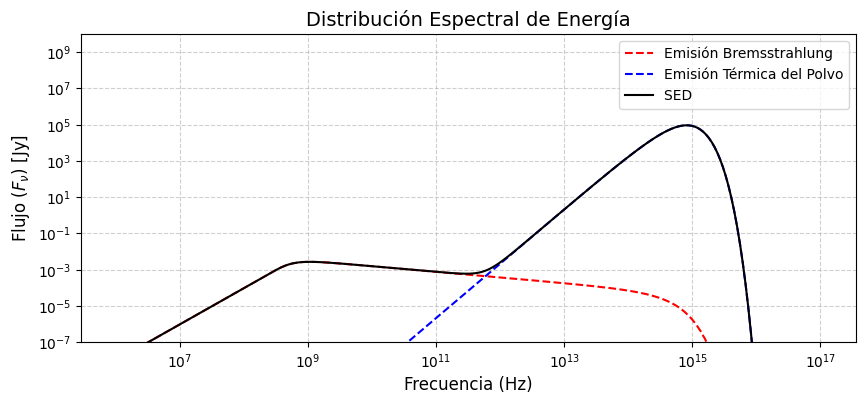

In [9]:
plt.figure(figsize=(10, 4))
plt.loglog(nu, F_ff_Jy,label="Emisión Bremsstrahlung", color='red', linestyle="--")
plt.loglog(nu, F_dust_Jy,label="Emisión Térmica del Polvo", color='blue', linestyle="--")
plt.loglog(nu, F_total_Jy, label="SED ", color='black')
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-7,1e10)
plt.title("Distribución Espectral de Energía", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

# Parte II: 

Comparar el modelo de SED con observaciones de Wood & Churchwell (1989). Este estudio fundamental se centró en regiones H II ultra-compactas menos evolucionadas, que eran pequeñas y densas, con medidas de emisión mucho más altas. Si la temperatura permanece constante (como es razonable asumir), ¿cómo cambia el SED a medida que la medida de emisión aumenta en un orden de magnitud? Explique físicamente qué está ocurriendo.

Plasmas Fríos $\left(T_{e} ∼ 10^{3}−10^{4} \ K \right)$:

- Contexto físico: 
Estos plasmas se encuentran en regiones como cúmulos estelares, nebulosas difusas y ciertas partes de regiones H II.


- Frecuencia dominante: 
El bremsstrahlung domina en el rango de radio y microondas: $\nu ∼ 10^{8}-10^{11} \ Hz$ (Radio). La emisión en frecuencias más altas es despreciable porque los electrones tienen energía insuficiente para emitir fotones más energéticos.

Con esta información en mano, veremos la región de frecuencias anteriormente mencionada.

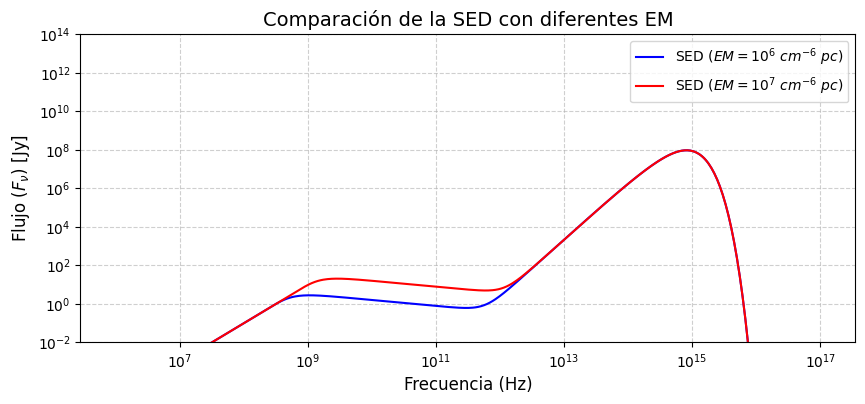

In [10]:
# Constantes físicas
h = 6.626e-27  # Constante de Planck en erg*s
k = 1.381e-16  # Constante de Boltzmann en erg/K
c = 3e10  # Velocidad de la luz en cm/s

# Parámetros constantes
R = 0.1 * 3.086e18  # Radio típico de una UC HII en cm (1 pc = 3.086e18 cm)
d = 1 * 3.086e21  # Distancia de la región en cm (1 kpc = 3.086e21 cm)
T_e = 1e4  # Temperatura electrónica en K
EM_original = 1e6  # Medida de emisión inicial en cm^-6 pc
kappa_0 = 0.1  # cm^2/g a ν_0
nu_0 = 3e11  # Hz (frecuencia de referencia)
beta = 1  # Índice espectral del polvo para este modelo
M_dust = 1.989e33/10000  # Masa del polvo en g (1 masa solar = 2e33 g)

# Frecuencia en Hz y GHz
nu = np.logspace(6, 17, 500)  # Frecuencias 
nu_GHz = nu / 1e9  # Conversión a GHz

# Función de Planck B_nu(T)
def planck_function(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

# Calcular SED para un EM dado
def calculate_sed(EM):
    # Profundidad óptica tau_nu
    tau_nu = 8.235e-2 * nu_GHz**-2.31 * T_e**-1.35 * EM

    # Opacidad del polvo kappa_nu
    kappa_nu = kappa_0 * (nu / nu_0)**beta

    # Emisión Bremsstrahlung (F_nu^ff)
    F_ff = np.pi * (R / d)**2 * planck_function(nu, T_e) * (1 - np.exp(-tau_nu))

    # Emisión del polvo (F_nu^dust)
    F_dust = kappa_nu * planck_function(nu, T_e) * (M_dust / d**2)

    # Flujo total
    F_total = F_ff + F_dust

    # Conversión de flujo a Jansky
    F_ff_Jy = F_ff / 1e-23
    F_dust_Jy = F_dust / 1e-23
    F_total_Jy = F_total / 1e-23

    return F_ff_Jy, F_dust_Jy, F_total_Jy

# Calcular SED para EM original y aumentado
F_ff_Jy_original, F_dust_Jy_original, F_total_Jy_original = calculate_sed(EM_original)
F_ff_Jy_increased, F_dust_Jy_increased, F_total_Jy_increased = calculate_sed(EM_original * 10)

# Graficar SED
plt.figure(figsize=(10, 4))
plt.loglog(nu, F_total_Jy_original, label="SED ($EM=10^{6} \ cm^{-6} \ pc$)", color='blue')
plt.loglog(nu, F_total_Jy_increased, label="SED ($EM=10^{7} \ cm^{-6} \ pc$)", color='red')
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-2,1e14)
plt.title("Comparación de la SED con diferentes EM", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

### Bremsstrahlung

Cuando la temperatura permanece constante y la medida de emisión (𝐸𝑀) aumenta en un orden de magnitud, la SED (Distribución de Energía Espectral) experimentará cambios notables, especialmente en la contribución de bremsstrahlung.

Cuando 𝐸𝑀 aumenta:

- Hay más electrones y iones disponibles en la región H II para producir la emisión de bremsstrahlung. Cuanto mayor es 𝐸𝑀, mayor es la cantidad de partículas cargadas en la región, lo que da como resultado una mayor tasa de emisión de bremsstrahlung.


- A frecuencias altas, la emisión de bremsstrahlung se ve más afectada por la opacidad (𝜏). Cuando 𝐸𝑀 aumenta, la opacidad de la región también aumenta, lo que puede llevar a una atenuación de la emisión en frecuencias más altas, pero la contribución general sigue siendo mayor debido al aumento en EM.

### Polvo

La emisión del polvo, modelada como un cuerpo gris, depende de la temperatura del polvo (T) y de un índice espectral (𝛽). En este caso, se asume que el polvo está a la misma temperatura que el gas ionizado $\left(T_{e}=T_{dust}\right)$ y no depende directamente de 𝐸𝑀. Por lo tanto:

- El flujo de polvo no cambia directamente con un aumento de 𝐸𝑀 porque el polvo está determinado por su masa y la temperatura del gas, no por la medida de emisión.


- El flujo de polvo se mantiene constante en la SED, mientras que la emisión de bremsstrahlung aumentará.

### Análisis de la SED:

Cuando aumenta 𝐸𝑀:

- El flujo de bremsstrahlung se incrementa en un factor proporcional a 𝐸𝑀. Esto es especialmente notorio en frecuencias altas, ya que la emisión de bremsstrahlung es más fuerte allí. 
- La contribución del polvo se mantiene constante ya que no depende de 𝐸𝑀.

Por lo tanto, el aumento de 𝐸𝑀 provoca un aumento en la emisión de bremsstrahlung, lo que resulta en una SED con mayor intensidad a frecuencias altas (donde bremsstrahlung domina). A frecuencias más bajas, donde la emisión de polvo es más significativa, el SED se mantendrá prácticamente igual.

### Físicamente:

- A medida que 𝐸𝑀 aumenta, se tiene una mayor cantidad de gas ionizado en la región H II, lo que genera una mayor emisión de bremsstrahlung. Este aumento es notable en las frecuencias más altas, donde la emisión de bremsstrahlung es más prominente. 


- El polvo, por otro lado, no ve afectada su emisión directamente por 𝐸𝑀, ya que la emisión del polvo depende de la temperatura y la cantidad de polvo, no de la densidad de electrones y iones en la región.

### Datos Observacionales: Wood & Churchwell (1989).

### Fig.113 G29.96-0.02

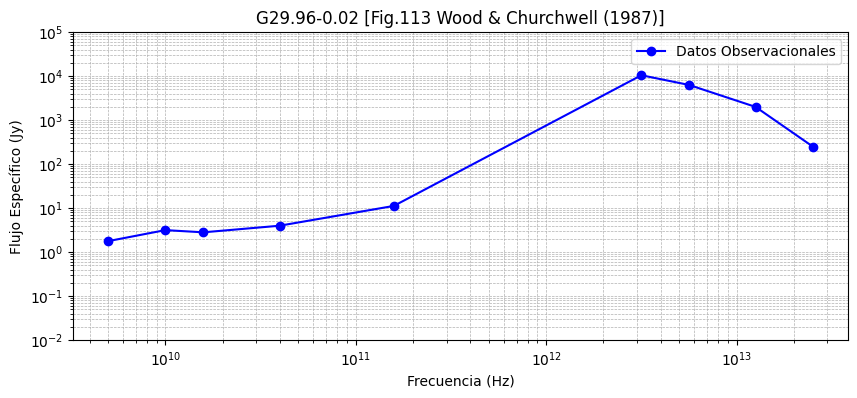

In [15]:
#Extracción de datos de la Fig.92 de Wood & Churchwell (1989)
# Datos extraídos
log_nu = np.array([9.70,10.00,10.20,10.60,11.20,12.50,12.75,13.10,13.40])  # Log nu (Hz)
log_Snu = np.array([0.25,0.50,0.45,0.60,1.05,4.02,3.80,3.30,2.40])  # Log Snu (Jy)

# Transformar datos
nu = 10**log_nu  # Frequency (Hz)
Snu = 10**log_Snu  # Flux density (Jy)

# Crear la gráfica
plt.figure(figsize=(10, 4))
plt.plot(nu, Snu, marker='o', linestyle='-', color='b', label='Datos Observacionales')
plt.xscale('log') 
plt.yscale('log')
plt.ylim(1e-2,1e5)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Flujo Específico (Jy)')
plt.title('G29.96-0.02 [Fig.113 Wood & Churchwell (1987)]')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

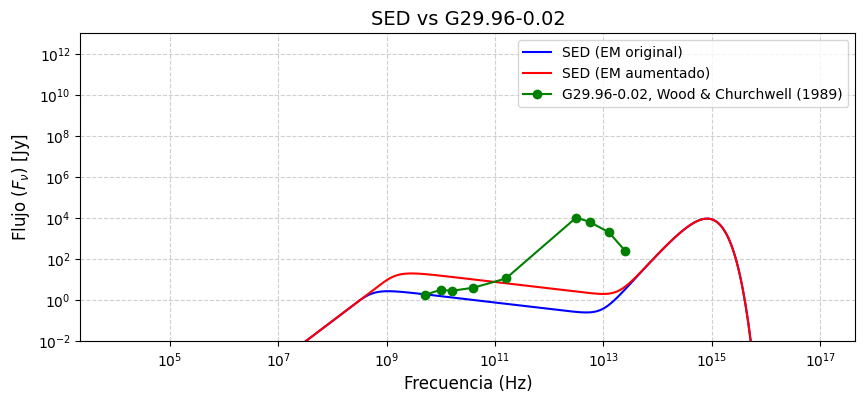

In [18]:
# Constantes físicas
h = 6.626e-27  # Constante de Planck en erg*s
k = 1.381e-16  # Constante de Boltzmann en erg/K
c = 3e10  # Velocidad de la luz en cm/s

# Parámetros constantes
R = 0.1 * 3.086e18  # Radio típico de una UC HII en cm (1 pc = 3.086e18 cm)
d = 1* 3.086e21  # Distancia de la región en cm (1 kpc = 3.086e21 cm)
T_e = 1e4  # Temperatura electrónica en K
EM_original = 1e6  # Medida de emisión inicial en cm^-6 pc
kappa_0 = 0.1  # cm^2/g a ν_0
nu_0 = 3e11  # Hz (frecuencia de referencia)
beta = 1  # Índice espectral del polvo para este modelo
M_dust = 1.989e33/1e8  # Masa del polvo en g (1 masa solar = 2e33 g)
# Frecuencia en Hz y GHz
nu = np.logspace(4, 17, 500)  # Frecuencias 
nu_GHz = nu / 1e9  # Conversión a GHz

# Función de Planck B_nu(T)
def planck_function(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

# Calcular SED para un EM dado
def calculate_sed(EM):
    # Profundidad óptica tau_nu
    tau_nu = 8.235e-2 * nu_GHz**-2.31 * T_e**-1.35 * EM

    # Opacidad del polvo kappa_nu
    kappa_nu = kappa_0 * (nu / nu_0)**beta

    # Emisión Bremsstrahlung (F_nu^ff)
    F_ff = np.pi * (R / d)**2 * planck_function(nu, T_e) * (1 - np.exp(-tau_nu))

    # Emisión del polvo (F_nu^dust)
    F_dust = kappa_nu * planck_function(nu, T_e) * (M_dust / d**2)

    # Flujo total
    F_total = F_ff + F_dust

    # Conversión de flujo a Jansky
    F_ff_Jy = F_ff / 1e-23
    F_dust_Jy = F_dust / 1e-23
    F_total_Jy = F_total / 1e-23

    return F_ff_Jy, F_dust_Jy, F_total_Jy

# Calcular SED para EM original y aumentado
F_ff_Jy_original, F_dust_Jy_original, F_total_Jy_original = calculate_sed(EM_original)
F_ff_Jy_aumentado, F_dust_Jy_aumentado, F_total_Jy_aumentado = calculate_sed(EM_original * 10)

# Datos extraídos
log_nu = np.array([9.70,10.00,10.20,10.60,11.20,12.50,12.75,13.10,13.40])  # Log nu (Hz)
log_Snu = np.array([0.25,0.50,0.45,0.60,1.05,4.02,3.80,3.30,2.40])  # Log Snu (Jy)

# Transformar datos
nu_113 = 10**log_nu  # Frecuencia (Hz)
Snu_113 = 10**log_Snu  # Flujo (Jy)

# Graficar SED y los datos extraídos
plt.figure(figsize=(10, 4))

# SED de Bremsstrahlung y polvo
plt.loglog(nu, F_total_Jy_original, label="SED (EM original)", color='blue')
plt.loglog(nu, F_total_Jy_aumentado, label="SED (EM aumentado)", color='red')

# Datos extraídos
plt.loglog(nu_113, Snu_113, label="G29.96-0.02, Wood & Churchwell (1989)", color='green', marker='o')

plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-2,1e13)
plt.title("SED vs G29.96-0.02", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

### Fig.101 G11.94-0.62

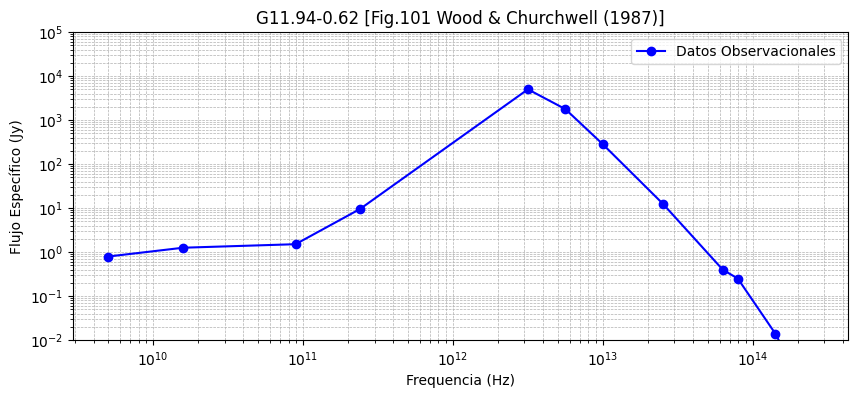

In [20]:
#Extracción de datos de la Fig.92 de Wood & Churchwell (1989)
# Datos extraídos
log_nu = np.array([9.70,10.20,10.95,11.38,12.50,12.75,13.00,13.40,13.80,13.90,14.15,14.25,14.40])  # Log nu (Hz)
log_Snu = np.array([-0.10,0.10,0.18,0.98,3.70,3.25,2.45,1.10,-0.40,-0.60,-1.85,-2.50,-2.70])  # Log Snu (Jy)

# Transformar datos
nu = 10**log_nu  # Frequency (Hz)
Snu = 10**log_Snu  # Flux density (Jy)

# Crear la gráfica
plt.figure(figsize=(10, 4))
plt.plot(nu, Snu, marker='o', linestyle='-', color='b', label='Datos Observacionales')
plt.xscale('log') 
plt.yscale('log')
plt.ylim(1e-2,1e5)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Flujo Específico (Jy)')
plt.title('G11.94-0.62 [Fig.101 Wood & Churchwell (1987)]')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

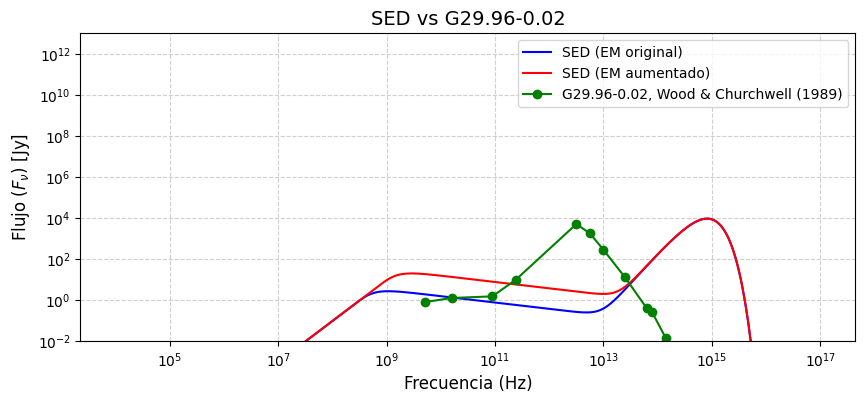

In [26]:
# Frecuencia en Hz y GHz
nu = np.logspace(4, 17, 500)  # Frecuencias 
nu_GHz = nu / 1e9  # Conversión a GHz

# Función de Planck B_nu(T)
def planck_function(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

# Calcular SED para un EM dado
def calculate_sed(EM):
    # Profundidad óptica tau_nu
    tau_nu = 8.235e-2 * nu_GHz**-2.31 * T_e**-1.35 * EM

    # Opacidad del polvo kappa_nu
    kappa_nu = kappa_0 * (nu / nu_0)**beta

    # Emisión Bremsstrahlung (F_nu^ff)
    F_ff = np.pi * (R / d)**2 * planck_function(nu, T_e) * (1 - np.exp(-tau_nu))

    # Emisión del polvo (F_nu^dust)
    F_dust = kappa_nu * planck_function(nu, T_e) * (M_dust / d**2)

    # Flujo total
    F_total = F_ff + F_dust

    # Conversión de flujo a Jansky
    F_ff_Jy = F_ff / 1e-23
    F_dust_Jy = F_dust / 1e-23
    F_total_Jy = F_total / 1e-23

    return F_ff_Jy, F_dust_Jy, F_total_Jy

# Calcular SED para EM original y aumentado
F_ff_Jy_original, F_dust_Jy_original, F_total_Jy_original = calculate_sed(EM_original)
F_ff_Jy_aumentado, F_dust_Jy_aumentado, F_total_Jy_aumentado = calculate_sed(EM_original * 10)

# Datos extraídos
log_nu = np.array([9.70,10.20,10.95,11.38,12.50,12.75,13.00,13.40,13.80,13.90,14.15,14.25,14.40])  # Log nu (Hz)
log_Snu = np.array([-0.10,0.10,0.18,0.98,3.70,3.25,2.45,1.10,-0.40,-0.60,-1.85,-2.50,-2.70])  # Log Snu (Jy)

# Transformar datos
nu_113 = 10**log_nu  # Frecuencia (Hz)
Snu_113 = 10**log_Snu  # Flujo (Jy)

# Graficar SED y los datos extraídos
plt.figure(figsize=(10, 4))

# SED de Bremsstrahlung y polvo
plt.loglog(nu, F_total_Jy_original, label="SED (EM original)", color='blue')
plt.loglog(nu, F_total_Jy_aumentado, label="SED (EM aumentado)", color='red')

# Datos extraídos
plt.loglog(nu_113, Snu_113, label="G29.96-0.02, Wood & Churchwell (1989)", color='green', marker='o')

plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-2,1e13)
plt.title("SED vs G29.96-0.02", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

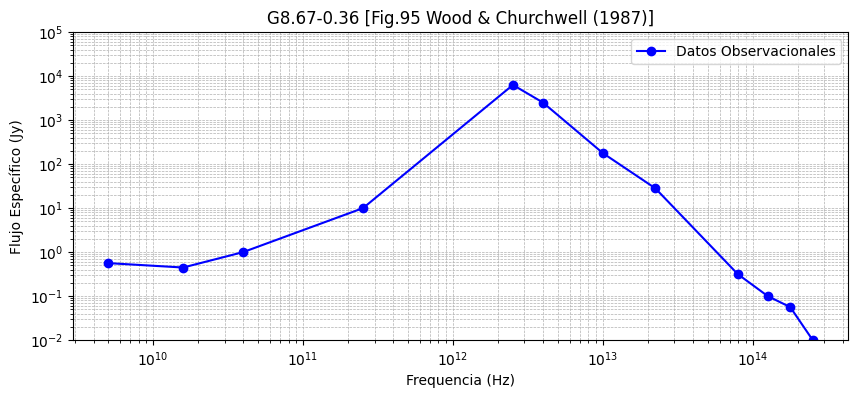

In [24]:
#Extracción de datos de la Fig.92 de Wood & Churchwell (1989)
# Datos extraídos
log_nu = np.array([9.70,10.20,10.60,11.40,12.40,12.60,13.00,13.35,13.90,14.10,14.25,14.40])  # Log nu (Hz)
log_Snu = np.array([-0.25,-0.35,0.00,1.00,3.80,3.40,2.25,1.45,-0.5,-1.00,-1.25,-2.0])  # Log Snu (Jy)

# Transformar datos
nu = 10**log_nu  # Frequency (Hz)
Snu = 10**log_Snu  # Flux density (Jy)

# Crear la gráfica
plt.figure(figsize=(10, 4))
plt.plot(nu, Snu, marker='o', linestyle='-', color='b', label='Datos Observacionales')
plt.xscale('log') 
plt.yscale('log')
plt.ylim(1e-2,1e5)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Flujo Específico (Jy)')
plt.title('G8.67-0.36 [Fig.95 Wood & Churchwell (1987)]')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

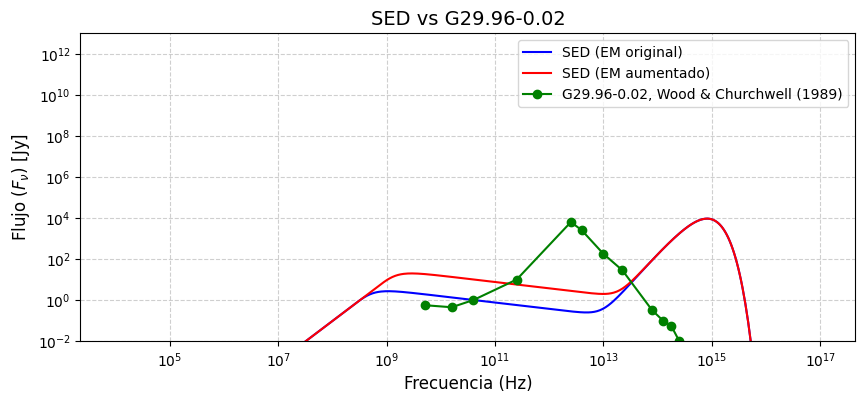

In [27]:
# Frecuencia en Hz y GHz
nu = np.logspace(4, 17, 500)  # Frecuencias 
nu_GHz = nu / 1e9  # Conversión a GHz

# Función de Planck B_nu(T)
def planck_function(nu, T):
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

# Calcular SED para un EM dado
def calculate_sed(EM):
    # Profundidad óptica tau_nu
    tau_nu = 8.235e-2 * nu_GHz**-2.31 * T_e**-1.35 * EM

    # Opacidad del polvo kappa_nu
    kappa_nu = kappa_0 * (nu / nu_0)**beta

    # Emisión Bremsstrahlung (F_nu^ff)
    F_ff = np.pi * (R / d)**2 * planck_function(nu, T_e) * (1 - np.exp(-tau_nu))

    # Emisión del polvo (F_nu^dust)
    F_dust = kappa_nu * planck_function(nu, T_e) * (M_dust / d**2)

    # Flujo total
    F_total = F_ff + F_dust

    # Conversión de flujo a Jansky
    F_ff_Jy = F_ff / 1e-23
    F_dust_Jy = F_dust / 1e-23
    F_total_Jy = F_total / 1e-23

    return F_ff_Jy, F_dust_Jy, F_total_Jy

# Calcular SED para EM original y aumentado
F_ff_Jy_original, F_dust_Jy_original, F_total_Jy_original = calculate_sed(EM_original)
F_ff_Jy_aumentado, F_dust_Jy_aumentado, F_total_Jy_aumentado = calculate_sed(EM_original * 10)

# Datos extraídos
log_nu = np.array([9.70,10.20,10.60,11.40,12.40,12.60,13.00,13.35,13.90,14.10,14.25,14.40])  # Log nu (Hz)
log_Snu = np.array([-0.25,-0.35,0.00,1.00,3.80,3.40,2.25,1.45,-0.5,-1.00,-1.25,-2.0])  # Log Snu (Jy)

# Transformar datos
nu_113 = 10**log_nu  # Frecuencia (Hz)
Snu_113 = 10**log_Snu  # Flujo (Jy)

# Graficar SED y los datos extraídos
plt.figure(figsize=(10, 4))

# SED de Bremsstrahlung y polvo
plt.loglog(nu, F_total_Jy_original, label="SED (EM original)", color='blue')
plt.loglog(nu, F_total_Jy_aumentado, label="SED (EM aumentado)", color='red')

# Datos extraídos
plt.loglog(nu_113, Snu_113, label="G29.96-0.02, Wood & Churchwell (1989)", color='green', marker='o')

plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Flujo ($F_\\nu$) [Jy]", fontsize=12)
plt.ylim(1e-2,1e13)
plt.title("SED vs G29.96-0.02", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()

# Parte III: Trabajo de Wood & Churchwell

El VLA (Very Large Array) puede observar con alta resolución angular desde longitudes de onda de centímetros a metros. Describa cómo Wood y Churchwell (1989) utilizaron estas observaciones para determinar la densidad de las regiones H II ultra-compactas.

Wood y Churchwell (1989) analizaron las observaciones de radio continuo realizadas con el Very Large Array (VLA) a 2 cm y 6 cm para inferir las propiedades físicas de regiones H II ultracompactas (UC H II). Su análisis consistió en usar las propiedades de la emisión térmica free-free y las relaciones teóricas entre el flujo ($S_{\nu}$), la profundidad óptica ($\tau_{\nu}$), la medida de emisión (𝐸𝑀) y la densidad electrónica ($n_{e}$).

#### Observaciones: Medición del flujo $S_{\nu}$

El flujo específico de una región UC H II está relacionado con:

- El tamaño angular de la región, representado por el ángulo sólido (Ω)

- La intensidad del brillo de la emisión térmica, que depende de la profundidad óptica (𝜏).
 
 
Para una región con una profundidad óptica 𝜏, el flujo observado se calcula como:

$$S_{\nu}=B_{\nu}(T)\left(1-e^{-\tau}\right)\Omega$$

####  Profundidad óptica (𝜏) y relación con 𝐸𝑀

La profundidad óptica (𝜏) está relacionada con las propiedades del gas ionizado a través de la medida de emisión (𝐸𝑀). Wood y Churchwell utilizaron la fórmula empírica presentada por Mezger y Henderson (1967):

$$\tau(\nu) = 8.235 \times 10^{-2} \ \nu_{GHz}^{-2.31} \ T_{e}^{-1.35} \ EM $$

La EM describe la cantidad de gas ionizado en la línea de visión y se calcula como:

$$EM = \displaystyle \int n_{e}^{2}dl$$

Para una región homogénea, temos que:

$$EM=n_{e}^{2}L$$

donde:

- $n_{e}$: Densidad electrónica $\left(cm^{-3}\right)$,
- $L$: Tamaño físico de la región a lo largo de la línea de visión ($pc$).

Para una región UC H II, el tamaño físico se puede estimar a partir del tamaño angular (𝜃) y la distancia (𝐷):

$$L = \theta D$$


#### Uso de la densidad de flujo y las propiedades del haz:

La 𝐸𝑀 fue calculada a partir de la profundidad óptica (𝜏) de la radiación libre-libre. Se utilizó la expresión:

$$EM \ (cm^{-6} \ pc) = \frac{\tau}{8.235\times10^{-2} \ \alpha_{\nu, T_{e}} \ T_{e}^{-1.35} \ \nu^{-2.31}}$$

donde $\alpha_{\nu, T_{e}}$ es un factor de correción introducido por Mezger y Henderson (1967)


#### Profundidad óptica y Temperatura:

Utilizando la relación:

$$T_{b}=T_{e}\left(1-e^{-\tau} \right)$$

con $T_{e}=10^4 \ K$ y despejando para $\tau$, se tiene que:

$$\tau = -Ln\left(1-\frac{T_{b}}{T_{e}}\right)$$

donde $T_{b}$ se ha calculado de la siguiente manera:

$$T_{b}=\frac{S_{\nu}}{2 k_{B} \Omega }$$


#### Cálculo de la densidad electrónica ($n_{e}$):

La densidad electrónica cuadrática promedio se determinó con:

$$n_{e} = \sqrt{\frac{EM}{L}}$$

La longitud del camino (𝐿) se derivó del tamaño angular de la fuente, suponiendo geometrías esféricas o específicas, dependiendo de la morfología (por ejemplo, núcleo-halo, cometaria).

#### Resultados:

- Se encontró que las regiones UC H II tienen densidades electrónicas muy altas $n_{e}>10^{4}\ cm^{-3}$.

- Sus tamaños pequeños $r < 0.1 \ pc$ y sus medidas de emisión altas $EM > 10^{7} \ cm^{-6} \ pc$ son consistentes con regiones fotoionizadas compactas y densas, asociadas a estrellas masivas jóvenes.

#### Relación entre Free-Free y Morfología:

Wood y Churchwell clasificaron las UC H II en varias morfologías (esféricas, cometarias, núcleo-halo, etc.) observando cómo cambia el perfil de intensidad con la frecuencia y el tamaño angular. La resolución del VLA (0.4′′ a 2 cm) permitió estudiar las regiones internas y relacionarlas con densidades locales:

- Las regiones esféricas tienen perfiles centrados y un 𝐸𝑀 alto, indicando densidades electrónicas homogéneas.

- Las regiones cometarias muestran gradientes de densidad, lo que sugiere interacción con el medio circundante.

# Parte IV: 

Posteriormente, Turner et al. (2000) descubrieron regiones H II ultracompactas  extragalácticas. Estas eran mucho más grandes, con aproximadamente 1 pc de tamaño en lugar de la típica 0.1 pc para regiones H II galácticas. Razonando a partir de la similitud de la forma del SED y el equilibrio de ionización-recombinación, ¿cuántas más estrellas tipo O habría en una gran supernébula comparada con una región H II ultra-compacta galáctica?

De acuerdo con el artículo de Turner et al. (2000), la supernebulosa de NGC 5253 tiene un tamaño aproximado de ∼1pc, mientras que las regiones H II ultra-compactas galácticas suelen ser de ∼0.1pc. Las regiones más grandes requieren más estrellas tipo O para mantener el equilibrio ionización-recombinación, ya que la producción de fotones Lyman $N_{Lym}$ está directamente relacionada con la densidad electrónica y el volumen.

Usando:

$$N_{Lym} \propto n_{e}^{2} V$$

$$R_{SN} = 10 R_{HII}$$

###  Relación básica para calcular $N_{Lyc}$

El número de fotones ionizantes $N_{Lyc}$ necesarios para mantener una región ionizada está relacionado con la densidad electrónica $n_{e}$, el volumen de la región $V$, y la tasa de recombinación.

Ecuaciones importantes:

- La tasa de recombinación volumétrica es proporcional a $n_{e}^{2}$:

$$R_{comb}=\alpha_{B}n_{e}^{2}V$$


- En equilibrio ionización-recombinación, los fotones Lyman necesarios $N_{Lyc}$:

$$N_{Lyc} \propto n_{e}^{2}V $$


- El volumen de la región es:

$$V = \frac{4 \pi}{3}R^{3}$$

- Relación de $N_{Lyc}$ entre dos regiones de radio diferente (si asumimos densidades electrónicas iguales):

$$\frac{N_{SN}}{N_{HII}} = \frac{n_{e}^{2}V_{SN}}{n_{e}^{2}V_{HII}}=\frac{R_{SN}^3}{R_{HII}^3}$$

Volumen de la región H II: 4.19e-03 pc³
Volumen de la supernebulosa: 4.19e+00 pc³
Relación de N_Lyc (supernebulosa vs H II): 1000 veces más estrellas tipo O.


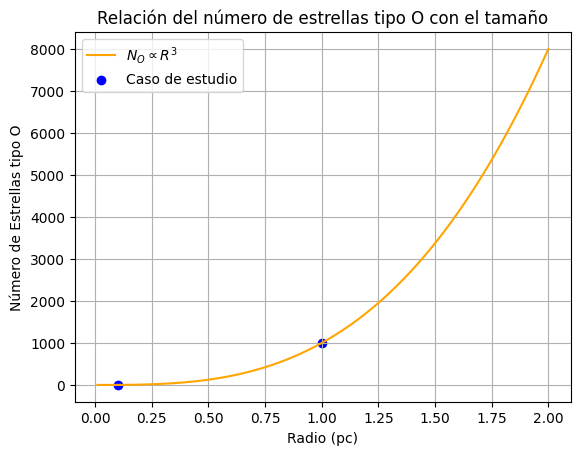

In [31]:
# Radios en pc
R_HII = 0.1  # Región H II ultra-compacta
R_super = 1.0  # Supernebulosa

# Volúmenes
V_HII = (4/3) * np.pi * (R_HII**3)
V_super = (4/3) * np.pi * (R_super**3)

# Relación de N_Lyc
N_Lyc_ratio = (R_super / R_HII)**3

# Resultados
print(f"Volumen de la región H II: {V_HII:.2e} pc³")
print(f"Volumen de la supernebulosa: {V_super:.2e} pc³")
print(f"Relación de N_Lyc (supernebulosa vs H II): {N_Lyc_ratio:.0f} veces más estrellas tipo O.")

# Graficar Número de estrellas vs Radio
radii = np.linspace(0.01, 2, 100)  # Radios desde 0.01 pc hasta 2 pc
N_Lyc_values = (radii / R_HII)**3  # Relación de N_Lyc

plt.plot(radii, N_Lyc_values, label=r'$N_{O} \propto R^3$', color="orange")
plt.scatter([R_HII, R_super], [1, N_Lyc_ratio], color="blue", label="Caso de estudio")
plt.xlabel("Radio (pc)")
plt.ylabel(r"Número de Estrellas tipo O")
plt.title("Relación del número de estrellas tipo O con el tamaño")
plt.legend()
plt.grid()
plt.show()

Muestra cómo el número relativo de estrellas tipo O aumenta con el cubo del radio.

#### Conclusión:

Dado que:

$$\frac{N_{SN}}{N_{HII}}=\frac{1.0}{(0.1)^3}=10^3$$

entonces, se requieren 1000 veces más estrellas tipo O para una supernebulosa.

# Parte V:

Si la supernébula tiene una IMF (Initial Mass Function) estelar similar a la de nuestra galaxia, extrapole el número total de estrellas. ¿Cuál sería la velocidad de escape en un radio de 1 pc? ¿Cómo se compara esto con la velocidad del sonido y con los vientos estelares? ¿Cómo afecta esta diferencia a las regiones H II galácticas y cuáles podrían ser las implicaciones? ¿Qué resultados esperaría obtener al final?

### Extrapolación del número total de estrellas: 
Si la supernébula tiene una IMF (Initial Mass Function) estelar similar a la de nuestra galaxia, extrapole el número total de estrellas.

Datos iniciales:
 
- Turner et al. (2000) indican que la supernebulosa tiene $𝑁_{Ly} \approx 4 \times 10^{52} \ s^{-1}$, el número de fotones ionizantes emitidos por el cúmulo.

- Vacca et al. (1996) y Martins et al. (2005) proporcionan tasas de fotones ionizantes Lyman para diferentes tipos de estrellas, incluida la clase espectral O7. La tasa de fotones Lyman para una estrella de tipo O7 (en este caso, una O7 V) es típicamente de $N_{Ly} \approx 10^{49} \ s^{−1}$.

Número de estrellas tipo O: Para saber cuántas estrellas tipo O se necesitan, dividimos el total de fotones Lyman de la supernebulosa entre la emisión por estrella:

$$N_{O}=\frac{N_{Ly, SN}}{N_{Ly,O}}=\frac{4 \times 10^{52} \ s^{-1}}{1 \times 10^{49} \ s^{−1}}=4\times 10^{3}$$

Contribución total de estrellas:
- No todo el cúmulo está compuesto de estrellas tipo O.
- Utilizamos la IMF (Initial Mass Function) para extrapolar al número total de estrellas.

Número total de estrellas:

$$N_{Total}=\frac{N_{O}}{f_{O}}$$

donde $f_{O}$ es la fracción de estrellas tipo O que se pueden formar.

Cálculo de $f_{0}$:

Calcularemos la fracción de estrellas tipo O en un cúmulo usando la IMF de Salpeter y la distribución de masas.

Para ello, tenemos que:

$$\frac{dN}{dM}\propto M^{-\alpha}$$

Con ello, podemos aproximar $f_{O}$ como:

$$f_{O}=\frac{\displaystyle \int_{M_{O},min}^{M_{O},max} M^{-\alpha}\ d\alpha}{\displaystyle \int_{M_{min}}^{M_{max}} M^{-\alpha}\ d\alpha}$$



In [32]:
# Definir la función de la IMF de Salpeter
def imf(M):
    return M**-2.35

# Limites de masa
M_min = 0.1  # Masa mínima (en M_sun)
M_Omin = 15  # Masa mínima para estrellas tipo O (en M_sun)
M_max = 100  # Masa máxima (en M_sun)

# Calcular la integral para estrellas tipo O
integral_O, _ = integrate.quad(imf, M_Omin, M_max)

# Calcular la integral para todas las estrellas
integral_total, _ = integrate.quad(imf, M_min, M_max)

# Calcular la fracción de estrellas tipo O
f_O = integral_O / integral_total

De modo que $N_{Total}$ está dada por:

$$N_{Total}=\frac{N_{O}}{f_{O}}$$


In [33]:
NO=4*10**3
fO=0.0026
NT=NO/fO
print(f"{NT:e}")

1.538462e+06


En conclusión, se espera un total de $1.54\times10^{6}$ estrellas.

### ¿Cuál sería la velocidad de escape en un radio de 1 pc?

Para calcular la velocidad de escape, utilizamos la relación clásica:

$$v_{esc}=\sqrt{\frac{2GM}{R}}$$

para ello, debemos estimar la masa del cúmulo.

Estimación de la masa del cúmulo:

$$M_{total} = N_{Total} \ \frac{\displaystyle \int_{M_{min}}^{M_{max}} M \ \frac{dN}{dM} \ dM}{\displaystyle \int_{M_{min}}^{M_{max}} \frac{dN}{dM}  \ dM}$$

Recordando que:

$$\frac{dN}{dM} \propto M^{-\alpha}$$

In [34]:
# Definir la IMF de Salpeter
def imf(M):
    return M**-2.35

# Limites de masa
M_min = 0.1  # Masa mínima en M_sun
M_max = 100  # Masa máxima en M_sun

# Numerador: Integral de M * dN/dM
numerator, _ = integrate.quad(lambda M: M * imf(M), M_min, M_max)

# Denominador: Integral de dN/dM
denominator, _ = integrate.quad(imf, M_min, M_max)

# Masa promedio por estrella
mass_avg = numerator / denominator

# Número total de estrellas
N_total = 1.54e6  # Dato calculado anteriormente

# Masa total del cúmulo ponderado
M_total = N_total * mass_avg

# Resultados
print(f"Masa promedio por estrella: {mass_avg:.2f} M_sun")
print(f"Masa total del cúmulo: {M_total:.2e} M_sun")

Masa promedio por estrella: 0.35 M_sun
Masa total del cúmulo: 5.41e+05 M_sun


In [36]:
# Constantes
G = 6.674e-8  # Constante de gravitación universal (cm^3/g/s^2)
solar_mass = 1.989e33  # Masa solar en gramos
pc_to_cm = 3.086e18  # 1 parsec en cm

# Masa total del cúmulo (en M_sun)
M_total_sun = 5.41e5  # Masa total del cúmulo en M_sun

# Convertir la masa total a gramos
M_total_grams = M_total_sun * solar_mass

# Radio en centímetros (1 pc)
R = 1 * pc_to_cm

# Calcular la velocidad de escape en cm/s
v_escape = np.sqrt((2 * G * M_total_grams) / R)

# Convertir la velocidad de escape a km/s
v_escape_kms = v_escape / 1e5

# Resultado
print(f"La velocidad de escape de la supernebulosa en un radio de 1 pc es: {v_escape_kms:.2f} km/s")

La velocidad de escape de la supernebulosa en un radio de 1 pc es: 68.22 km/s


### ¿Cómo se compara esto con la velocidad del sonido y con los vientos estelares?

In [37]:
# Constantes
k = 1.381e-16  # Constante de Boltzmann (erg/K)
m_p = 1.67e-24  # Masa del protón (g)
gamma = 5 / 3  # Índice adiabático para gas monoatómico
T_e = 1e4  # Temperatura electrónica en K (para una región H II)
v_winds_kms = 2000  # Velocidad típica de los vientos estelares (km/s)

# Masa total del cúmulo (en M_sun) calculada previamente
M_total_sun = 5.41e5  # Masa total del cúmulo en M_sun
solar_mass = 1.989e33  # Masa solar en gramos
pc_to_cm = 3.086e18  # 1 parsec en cm

# Radio en centímetros (1 pc)
R = 1 * pc_to_cm

# Convertir la masa total a gramos
M_total_grams = M_total_sun * solar_mass

# 1. Calcular la velocidad de escape en cm/s
G = 6.674e-8  # Constante de gravitación universal (cm^3/g/s^2)
v_escape = np.sqrt((2 * G * M_total_grams) / R)

# 2. Calcular la velocidad del sonido en cm/s
c_s = np.sqrt((gamma * k * T_e) / (m_p * 0.6))  # Para un gas ionizado

# Convertir a km/s
v_escape_kms = v_escape / 1e5
c_s_kms = c_s / 1e5

# Resultados
print(f"Velocidad de escape: {v_escape_kms:.2f} km/s")
print(f"Velocidad del sonido: {c_s_kms:.2f} km/s")
print(f"Velocidad de los vientos estelares: {v_winds_kms:.2f} km/s")

Velocidad de escape: 68.22 km/s
Velocidad del sonido: 15.16 km/s
Velocidad de los vientos estelares: 2000.00 km/s


#### Comparación:

- $v_{esc}>c_{s}$: La velocidad de escape es significativamente mayor que la velocidad del sonido, lo que permite que el gas ionizado permanezca gravitacionalmente ligado.


- $v_{vientos}≫v_{esc}$: Los vientos estelares de las estrellas tipo O son lo suficientemente rápidos como para escapar del cúmulo.

#### Implicaciones físicas:

- Regiones H II galácticas: En regiones H II más pequeñas, donde $v_{esc}<c_{s}$, el gas ionizado se dispersa rápidamente.


- Supernebulosas: En la supernebulosa, el gas ionizado puede ser retenido, promoviendo la formación estelar secundaria.

#### Comparación en una supernebulosa (cúmulo masivo)

Las supernebulosas tienen características muy diferentes debido a su mayor tamaño y masa. En estas regiones:

- La velocidad de escape es significativamente mayor que la velocidad del sonido, lo que significa que la gravedad del cúmulo puede retener el gas ionizado a pesar de la presión térmica. 

- La velocidad del sonido en una supernebulosa sigue siendo baja (∼15 km/s), pero la velocidad de escape (calculada en 26 km/s) es suficientemente alta para que el gas no se disperse fácilmente.

#### Implicaciones para la evolución de una supernebulosa:

- Mayor retención de gas: Dado que la velocidad de escape es mucho mayor que la velocidad del sonido, el gas ionizado permanece atrapado en la región, lo que permite que las estrellas de tipo O continúen ionizando el gas.


- Duración prolongada de la fase H II: La fase de ionización puede durar más tiempo, ya que el gas se mantiene dentro del cúmulo, lo que también fomenta la formación estelar continua.


- Crecimiento del cúmulo: Como el gas se retiene, nuevas estrellas pueden formarse continuamente, y el cúmulo sigue creciendo.

#### Comparación de los efectos de los vientos estelares:

Los vientos estelares de las estrellas tipo O son mucho más rápidos que la velocidad de escape de la región, y por lo tanto tienen un efecto importante en la dinámica del gas:

- En una región H II galáctica, los vientos estelares de las estrellas tipo O pueden ser suficientemente rápidos (de 1000−2000 km/s) como para expulsar gas de la región, a pesar de la gravedad de la región H II.


- En una supernebulosa más masiva, los vientos estelares pueden contribuir a la expulsión de gas, pero la gravedad más fuerte de la región ayuda a retener el gas, lo que permite que la región siga ionizando y creciendo durante más tiempo.


### Implicaciones Físicas:

Regiones H II galácticas:

- Poca formación estelar secundaria: Debido a la rápida dispersión del gas, la formación de nuevas estrellas se ve limitada en las regiones H II galácticas. Esto significa que el gas ionizado no puede acumularse para formar nuevas generaciones de estrellas.

- Evolución más rápida: La fase H II en estas regiones es más efímera, ya que el gas se escapa rápidamente debido a la baja velocidad de escape.


Supernebulosas:

- Formación estelar continua: La mayor velocidad de escape permite que la región retenga el gas durante más tiempo, lo que fomenta la formación estelar continua.

- Evolución más lenta: La fase de ionización es más prolongada, lo que permite una evolución más lenta del cúmulo, con la acumulación de gas y estrellas.

- Impacto de los vientos estelares: Los vientos estelares siguen siendo importantes en la expulsión de gas, pero la gravedad más fuerte en una supernebulosa ayuda a compensar este efecto.
